# Day 24 In-class Assignment: Analyzing climate data

### <p style="text-align: right;"> &#9989; Kaitlyn Watson</p>

#### <p style="text-align: right;"> &#9989; Carson, Matt, and Tara</p>

<img src="https://imagecache.jpl.nasa.gov/images/edu/activities/temp_graphing_main-640x350.jpg" width=500px>

## Goals for today's in-class assignment

* Analyze multiple datasets to understand trends and correlations between different experimental measurements relating to the Earth's climate

## Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.  If you haven't completed all sections of the assignment, you still need to upload something!

---
**In today's class**, we are going to examine several datasets that show how various quantities (such as global temperature and atmospheric carbon dioxide levels) have evolved over time.  The datasets that we will use are:

### Direct measurments from modern era:
1. `GLB.Ts.csv`: Measurements of global mean air temperatures from 1880 through the present day. Note that temperatures are in hundredths of a degree Kelvin. The header is 1 line long.

2. `co2_mm_mlo.txt`: Measurements of average monthly atmospheric carbon dioxide (CO2) concentration from 1958 through the present. The header is 72 lines long.

3. `ch4_annmean_gl.txt`: Measurements of average average yearly methane (CH4) concentrations from 1984 through the present. The header is 56 lines long.

### Estimates from marine sediment data:

4. `bintanja2008.txt` -- A reconstruction of the global surface
temperature, deep-sea temperature, ice volume, and relative sea level
for the last 3 million years.  The header is 109 lines long.

### Estimates from ice core data: 

5. `vostok-deutnat.txt`: Reconstructions of the global atmospheric
temperature using ice core data.  Note that column 2 is ice age (i.e.,
number of years in the past) and column 4 is the temperature
difference from the present day in degrees Kelvin.  The header is 111
lines long.

6. `vostok-co2nat.txt`: Reconstructions of the global carbon dioxide
(CO2) concentration using ice core data.  The header is 155 lines
long.

6. `vostok-ch4nat.txt`: Reconstructions of the global methane (CH4)
concentration using ice core data.  The header is 86 lines long. 

Open up each of the datasets and look at the headers - that is, the block of text at the top that describes what's in the file.  You will have to do this to understand which columns you want to use, what the units are, and so on.  Additional details on these data files are provided at the bottom of this notebook.

---

### &#9989;&nbsp; Using Numpy, read each of these datasets into numpy arrays!

You may run into confusing issues if you try to use Pandas to read in these datasets. Given this, you are expected to use `np.loadtxt()` to read them in. You will have to take into account the fact that each of the files has a header of a different length - you can either figure the length out yourself, or **look at the README provided at the bottom of this notebook**.  You also need to **modify the times and temperatures for each dataset so that they have consistent units** (since some datasets are in "years before present", whereas others use the Gregorian dating system, and some of the datasets use temperature differences in Kelvin whereas others use hundredths of a Kelvin. If you're not familiar with Kelvin as a temperature unit, look [here](https://en.wikipedia.org/wiki/Kelvin)).

**The comments provided for you in the cell below explain how you need to modify the datasets to make them consistent and which columns are important.**

In [71]:
# put your code here
import numpy as np
import matplotlib.pyplot as plt

# load in GLB.Ts.csv
# You want columns 0 and 13, which are time in Gregorian time and temperature in 0.01 K
# You should divide the temperature anomaly values by 100 to get them in Kelvin
global_temp_recent = np.loadtxt('GLB.Ts.csv',skiprows=1,unpack=True,delimiter=',')
global_temp_recent[13] /= 100.0


# load in co2_mm_mlo.txt
# column 2 is year with decimal dates, column 4 is CO2 in PPM (interpolated to fill missing values)
# There's nothing you need to change for this dataset
co2 = np.loadtxt('co2_mm_mlo.txt',skiprows=72,unpack=True)


# load in ch4_annmean_gl.txt
# column 0 is year, column 1 is CH4 in PPB
# There's nothing you need to change of this dataset
ch4 = np.loadtxt('ch4_annmean_gl.txt',skiprows=56,unpack=True)

# load in bintanja2008.txt
# column 0 is time in kiloyears before 2018, and column 4 is atmospheric temperature
# You should multiply the time values by -1000 and add 2018 to get them in the right units
global_temp_bintanjan = np.loadtxt('bintanja2008.txt',skiprows=109,unpack=True)

global_temp_bintanjan[0] *= -1000.0
global_temp_bintanjan[0] += 2018.0


# load in vostok-deutnat.txt
# column 1 is the ice age (in years before 2001), column 3 is delta-T in K
# You should mutiply the time information by -1 and add 2001 to get them in the right units
vostok_temp = np.loadtxt("vostok-deutnat.txt",skiprows=111,unpack=True)
vostok_temp[1] *= -1.0
vostok_temp[1] += 2001.0


# load in vostok-co2nat.txt
# column 0 is the ice age (in years before 2001), column 1 is concentration in ppm
# You should mutiply the time information by -1 and add 2001 to get them in the right units
vostok_co2 = np.loadtxt("vostok-co2nat.txt",skiprows=155,unpack=True)
vostok_co2[0] *= -1.0
vostok_co2[0] += 2001.0


# load in vostok-ch4nat.txt
# column 0 is the ice age (in years before 2001), column 1 is concentration in ppb
# You should mutiply the time information by -1 and add 2001 to get them in the right units
vostok_ch4 = np.loadtxt("vostok-ch4nat.txt",skiprows=86,unpack=True)
vostok_ch4[0] *= -1.0
vostok_ch4[0] += 2001.0



array([284.7, 272.8, 268.1, 262.2, 254.6, 259.6, 261.6, 263.7, 244.8,
       238.3, 236.2, 225.3, 182.2, 189.2, 191.6, 188.5, 191.7, 205.4,
       209.1, 209.1, 189.3, 188.4, 210.1, 215.7, 190.4, 221.8, 210.4,
       195.4, 191.4, 195. , 227.4, 229.2, 217.1, 221.8, 231. , 241.1,
       236.4, 228.1, 214.2, 217. , 208. , 224.3, 228.4, 232.1, 225.9,
       230.9, 236.9, 228.2, 236.9, 230.7, 238.2, 245.7, 251.3, 256.8,
       266.3, 261.4, 274.6, 273.3, 262.5, 267.6, 273.8, 272. , 265.2,
       277.7, 272.2, 276.5, 268.7, 266.6, 266.3, 279.8, 277.2, 273.8,
       267.1, 262.5, 262.6, 275.4, 274.1, 287.1, 286.8, 282.7, 264.1,
       263.4, 259. , 240.4, 224. , 208.9, 204.6, 198.1, 201.8, 202.5,
       195.9, 194.4, 193.4, 190.2, 192.3, 196.5, 190.4, 197. , 191.9,
       189. , 185.5, 204.4, 191.6, 183.8, 197.9, 197.8, 190.3, 190.1,
       207.7, 213.2, 217.7, 199.8, 203.5, 210.7, 231.4, 231.5, 218. ,
       220.1, 242.6, 251. , 239.1, 247.7, 244.4, 232.2, 228.7, 238.2,
       242.2, 244.6,

---
### Now, let's examine the datasets!

You've already looked at the Bintanjan dataset in the pre-class assignment, so we won't worry about that for the time being.

&#9989;&nbsp; But, let's make a matplotlib subplot that shows the global temperature, CO2, and CH4 concentrations since 1880 (and in the case of the CO2 and CH4 data, for as long as you have data) using the files ```GLB.Ts.csv```, ```co2_mm_mlo.txt```, and ```ch4_annmean_gl.txt```.  Make sure that they all have the same x-axis! You should get something that looks like this:

<img src="https://i.imgur.com/MmbnL1l.png">

Text(0, 0.5, 'CH4 Concentration [PPH]')

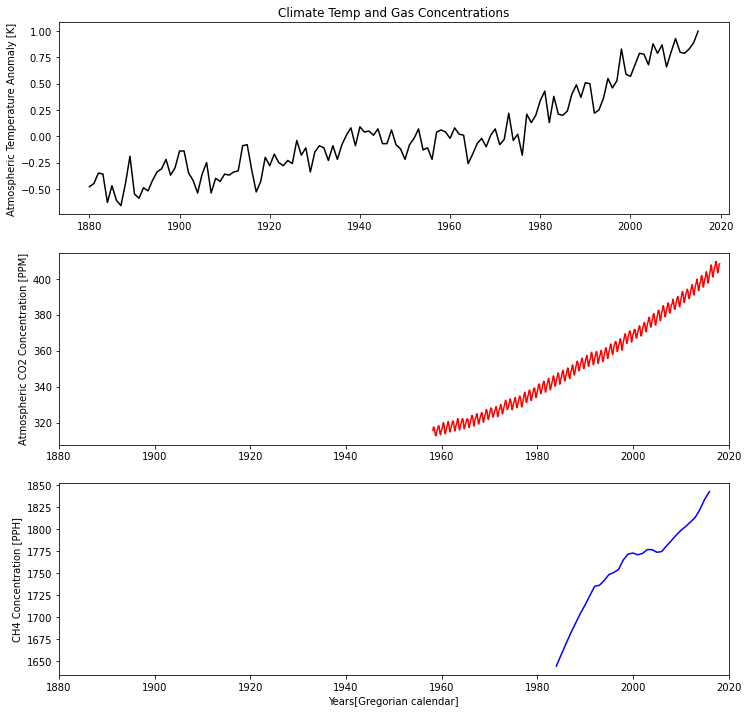

In [56]:
# put your code here
plt.figure(1,figsize=(12,12))
plt.subplot(311)
plt.plot(global_temp_recent[0], global_temp_recent[13], color='black')
plt.title("Climate Temp and Gas Concentrations")
plt.ylabel('Atmospheric Temperature Anomaly [K]')
plt.subplot(312)
plt.plot(co2[2],co2[4],color='red')
plt.xlim(1880,2020)
plt.ylabel('Atmospheric CO2 Concentration [PPM]')

plt.subplot(313)
plt.plot(ch4[0],ch4[1],color='blue')
plt.xlim(1880,2020)
plt.xlabel('Years[Gregorian calendar]')
plt.ylabel("CH4 Concentration [PPH]")

&#9989;&nbsp; **Question:** What relationship do you see between the temperature, CO2 concentration, and CH4 concentration in the recent data?

<font size="+3">&#9998;</font> Between all three datasets, we see a increase in CH4, CO2, and Atmospheric temperature.In the most recent years, there steeper the increase in the trends meaning the concentrations and temperatures are rapidly changing.

**Now, let's visualize the Vostok ice core data.**

&#9989;&nbsp; Make a subplot that shows the same three quantities - temperature, CO2 concentration, and CH4 concentration - as a function of time.

Your plot should end up looking similar to this:

<img src="https://i.imgur.com/aIgnsun.png">

Text(0, 0.5, 'CH4 Concentration [PPH]')

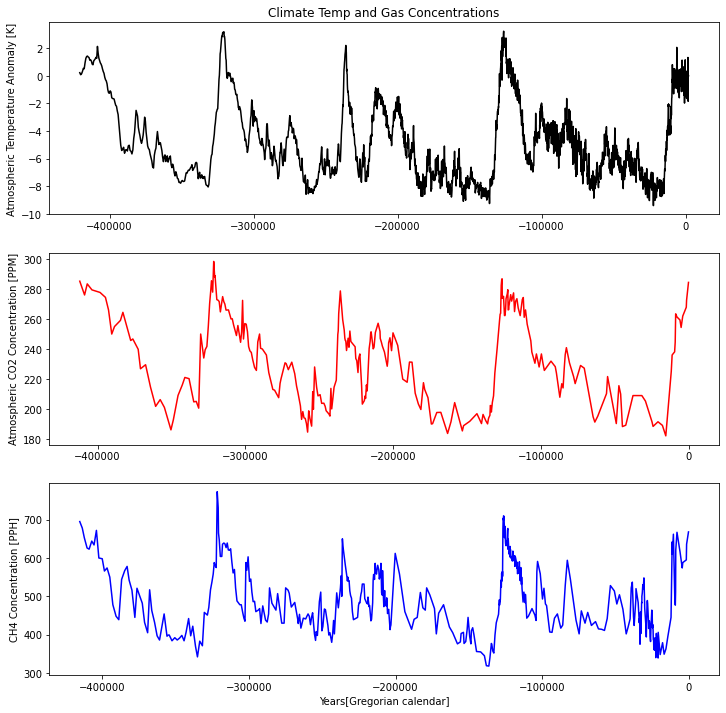

In [76]:
# put your code here
plt.figure(1,figsize=(12,12))
plt.subplot(311)
plt.plot(vostok_temp[1], vostok_temp[3], color='black')
plt.title("Climate Temp and Gas Concentrations")
plt.ylabel('Atmospheric Temperature Anomaly [K]')
plt.subplot(312)
plt.plot(vostok_co2[0],vostok_co2[1],color='red')

plt.ylabel('Atmospheric CO2 Concentration [PPM]')

plt.subplot(313)
plt.plot(vostok_ch4[0],vostok_ch4[1],color='blue')

plt.xlabel('Years[Gregorian calendar]')
plt.ylabel("CH4 Concentration [PPH]")

&#9989;&nbsp; **Questions:** 

1.  Does this data suggest similar relationships between the temperature, CO2, and CH4 concentrations as the data you examined above?
2.  Does this data show the same patterns as the Bintanjan data that you displayed as part of your pre-class assignment?


<font size="+3">&#9998;</font> All three graphs have very similar trends and fluctuate at the same time intervals. This data is similar to the pre-class data about gloabl warming. As we come to more recent years, there is a general spike in all concentrations and temperatures.  

**Now, let's put both on the same plot.**

&#9989;&nbsp; To put the ice core measurements in context, adjust the *subplot above* so that it shows the most recent temperature, CO2 and CH4 measurements *from the dataset that spans from 1880-2020.*  This can be done using either a red circle or a horizontal line. 

Text(0, 0.5, 'CH4 Concentration [PPH]')

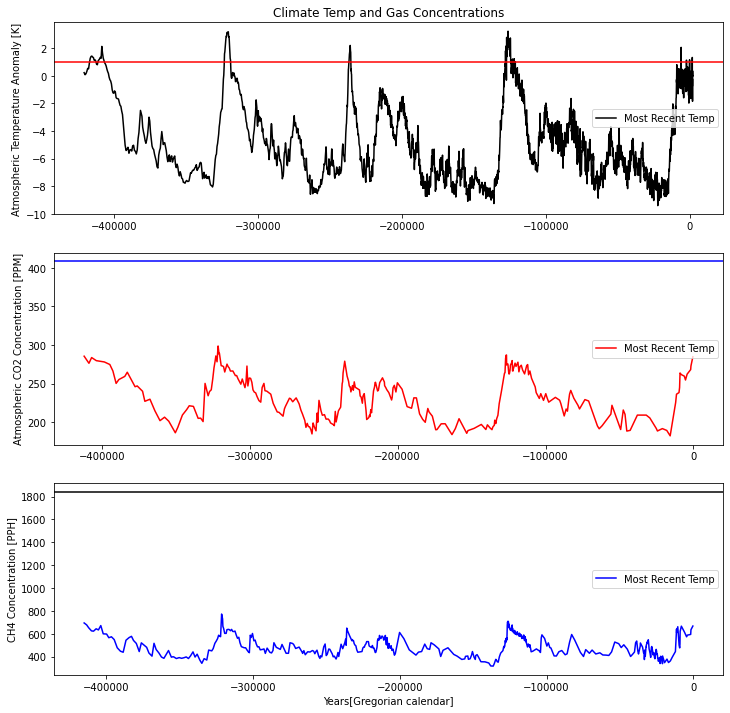

In [94]:
recent_temp=global_temp_recent[13][-1]
recent_co2=co2[4][-1]
recent_ch4=ch4[1][-1]

plt.figure(1,figsize=(12,12))
plt.subplot(311)
plt.plot(vostok_temp[1], vostok_temp[3], color='black')
plt.title("Climate Temp and Gas Concentrations")
plt.ylabel('Atmospheric Temperature Anomaly [K]')
plt.legend(['Most Recent Temp'], loc="right")
plt.axhline(y=recent_temp, color='r', linestyle='-')
plt.subplot(312)
plt.plot(vostok_co2[0],vostok_co2[1],color='red')
plt.legend(['Most Recent Temp'], loc="right")

plt.axhline(y=recent_co2, color='b', linestyle='-')
plt.ylabel('Atmospheric CO2 Concentration [PPM]')

plt.subplot(313)
plt.plot(vostok_ch4[0],vostok_ch4[1],color='blue')
plt.legend(['Most Recent Temp'], loc="right")
plt.axhline(y=recent_ch4, color='black', linestyle='-')
plt.xlabel('Years[Gregorian calendar]')
plt.ylabel("CH4 Concentration [PPH]")

&#9989;&nbsp; **Questions:** 

1.  How does the most recent temperature measurement compare with the range in the ice core measurements?
2.  How do the most recent CO2 and CH4 concentrations compare?


The most recent temperature is within range of the data. It is still a but higher then most of the historic data, but it falls in line with some of the spikes and fluctuations. On the other hand, CO2 and CH4 concentrations are much higher than the historic data.

---
### Now, let's make some predictions

Now, let's extrapolate this data into the future - in particular, we want to predict how global carbon dioxide concentration, and also global temperature, will rise over the next few decades if current trends continue.

&#9989;&nbsp; Examine how both global temperature and global CO2 concentration have changed since 1960.  Do the trends look like linear trends, exponential trends, or something else?  Choose a reasonable period of time over which to fit the data (at least several decades), and fit the appropriate curve to the data.  Answer this question: *What will the global temperature and CO2 concentrations be 20, 50, and 100 years from now?*

**Show this with a plot, and describe your outcomes below**.  (Hint: try using SciPy's [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) methods!)

If you decide it would be useful, one possible general equation for an exponential curve is:

$$ f(t) = A e^{B(t-C)} + D $$

If you're going to use the exponential function, you will need to use `p0` keyword to make an initial guess (and the initial guess will need to be pretty good!).

Text(0, 0.5, 'Temperature [K]')

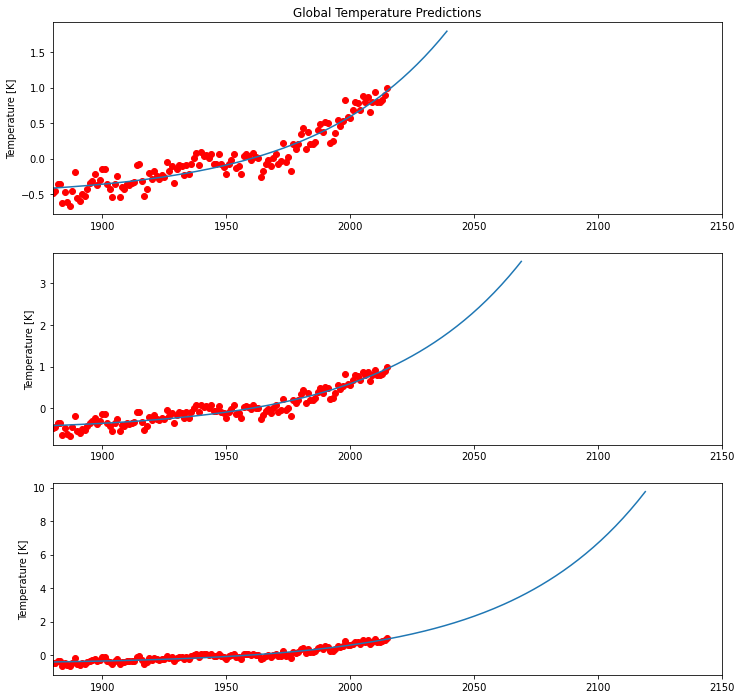

In [148]:
# put your code here
from scipy.optimize import curve_fit
#Create a exponential function


time=global_temp_recent[0]
temp=global_temp_recent[13]

def exp_fit(x, A,B,C,D):
    return (A*np.exp(B*(x-C)))+D

#Find parameters

popt, popc = curve_fit(exp_fit, time, temp,p0=[100,.001,1,0])

a=popt[0]
b=popt[1]
c=popt[2]
d=popt[3]

#predicting data and plotting 
time_20=np.arange(1860, 2020+20)
time_50=np.arange(1860, 2020+50)
time_100=np.arange(1860, 2020+100)
y_expected=exp_fit(global_temp_recent[0],a,b,c,d)
y_expected20=exp_fit(time_20,a,b,c,d)
y_expected50=exp_fit(time_50,a,b,c,d)
y_expected100=exp_fit(time_100,a,b,c,d)

#plt.subplot(311)
#plt.plot(time, y_expected)
#plt.scatter(time,temp, color='r')

plt.figure(1, figsize=(12,12))

plt.subplot(311)
plt.plot(time_20, y_expected20)
plt.scatter(time,temp, color='r')
plt.xlim([1880, 2150])
plt.title("Global Temperature Predictions")
plt.ylabel('Temperature [K]')
plt.subplot(312)
plt.plot(time_50, y_expected50)
plt.scatter(time,temp, color='r')
plt.xlim([1880, 2150])
plt.ylabel('Temperature [K]')
plt.subplot(313)
plt.plot(time_100, y_expected100)
plt.scatter(time,temp, color='r')
plt.xlim([1880, 2150])
plt.ylabel('Temperature [K]')


<font size="+3">&#9998;</font> 

---
# Datasets README


1. Measurements of global mean air temperatures from 1880 through 2015. Specifically, these are recorded as **deviations from the mean temperature** at a particular time. This data, in the file ```GLB.Ts.csv```, comes from the [NASA GISS surface temperature website](http://data.giss.nasa.gov/gistemp/), "Global-mean monthly, seasonal, and annual means, 1880-present."  See [this file](http://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts.txt) for clues as to what the columns mean.  Note that these temperatures are measured directly (i.e., with thermometers), rather than estimated using a proxy!
2. Measurements of average monthly atmospheric [carbon dioxide](https://en.wikipedia.org/wiki/Carbon_dioxide) (CO2) concentration from 1958 through the present, measured at the Mauna Loa Observatory in Hawaii.  This data, in the file ```co2_mm_mlo.txt,``` comes from the [Earth Systems Research Laboratory](https://www.esrl.noaa.gov/gmd/ccgg/trends/) global monitoring division, and can be [found here](ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt).  Note that the "concentration" data is reported in units of "micromol/mol", meaning parts per million in the atmosphere.  This data is measured directly.
3. Measurements of average average yearly [methane](https://en.wikipedia.org/wiki/Methane) (CH4) concentrations from 1984 through the present, measured at a variety of locations around the world.  This data, in the file ```ch4_annmean_gl.txt```, also comes from the [Earth Systems Research Laboratory](https://www.esrl.noaa.gov/gmd/ccgg/trends_ch4/), and can be [found here](ftp://aftp.cmdl.noaa.gov/products/trends/ch4/ch4_annmean_gl.txt).  In this file, the "concentration level" is listed in parts per billion (rather than parts per million, as was done with CO2).  This data is measured directly.

4. A reconstruction of the global surface temperature, deep-sea temperature, ice volume, and relative sea level for the last **3 million years**.  This data, in the file ```bintanja2008.txt```, comes from the National Oceanic and Atmospheric Administration's National Climatic Data Center website, and can be [found here](https://www.ncdc.noaa.gov/paleo-search/study/11933).  Note that the temperature measurements in this file are estimated using a proxy measurement using the chemical composition of core samples from ocean sediments.

5. Reconstructions of the global atmospheric temperature, as well as atmospheric CO2 and CH4 levels, from [ice core samples](https://en.wikipedia.org/wiki/Ice_core) taken at the [Vostok Research Station](https://en.wikipedia.org/wiki/Vostok_Station) in Antarctica.  Again, the temperature values are recorded as deviations from the mean temperature at a particular time. This data is in the files ```vostok-deutnat.txt``` (temperature), ```vostok-co2nat.txt``` (CO2), and ```vostok-ch4nat.txt``` (CH4).  This data was obtained from the [National Centers for Environmental Information](https://www.ncdc.noaa.gov/) and can be found [at this web page](https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/vostok/).  The temperature is estimated; CO2 and CH4 concentrations are measured directly from the ice.

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [149]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2018,  Michigan State University Board of Trustees